Installing dependencies

In [49]:
%%capture
%pip install scipy matplotlib pandas

Importing modules

In [50]:
from scipy.io import wavfile
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
import pandas as pd
import scipy.fftpack

First. we generate a sound. 3 seconde of beep. one of silence. then 3 seconds of another beep

In [51]:
def get_signal_Hz(Hz,sample_rate,length_ts_sec):
    ## 1 sec length time series with sampling rate
    ts1sec = list(np.linspace(0,np.pi*2*Hz,sample_rate))
    ## 1 sec length time series with sampling rate
    ts = ts1sec*length_ts_sec
    return(list(np.sin(ts)))

sample_rate   = 44100
length_ts_sec = 3
## --------------------------------- ##
## 3 seconds of "digit 1" sound
## Pressing digit 2 buttom generates
## the sine waves at frequency
## 697Hz and 1209Hz.
## --------------------------------- ##
ts1  = np.array(get_signal_Hz(5000, sample_rate,length_ts_sec))
ts1  = list(ts1)

## -------------------- ##
## 2 seconds of silence
## -------------------- ##

## --------------------------------- ##
## 3 seconds of "digit 2" sounds
## Pressing digit 2 buttom generates
## the sine waves at frequency
## 697Hz and 1336Hz.
## --------------------------------- ##

## -------------------- ##
## Add up to 7 seconds
## ------------------- ##
ts = ts1
wavfile.write('sounds/re_mi.waw', data=np.array(ts), rate=sample_rate)

In [52]:
# def get_signal_Hz(Hz,sample_rate,length_ts_sec):
#     ## 1 sec length time series with sampling rate
#     ts1sec = list(np.linspace(0,np.pi*2*Hz,sample_rate))
#     ## 1 sec length time series with sampling rate
#     ts = ts1sec*length_ts_sec
#     return(list(np.sin(ts)))
#
# sample_rate   = 4000
# length_ts_sec = 3
# ## --------------------------------- ##
# ## 3 seconds of "digit 1" sound
# ## Pressing digit 2 buttom generates
# ## the sine waves at frequency
# ## 697Hz and 1209Hz.
# ## --------------------------------- ##
# ts1  = np.array(get_signal_Hz(697, sample_rate,length_ts_sec))
# ts1 += np.array(get_signal_Hz(1209,sample_rate,length_ts_sec))
# ts1  = list(ts1)
#
# ## -------------------- ##
# ## 2 seconds of silence
# ## -------------------- ##
# ts_silence = [0]*sample_rate*1
#
# ## --------------------------------- ##
# ## 3 seconds of "digit 2" sounds
# ## Pressing digit 2 buttom generates
# ## the sine waves at frequency
# ## 697Hz and 1336Hz.
# ## --------------------------------- ##
# ts2  = np.array(get_signal_Hz(697, sample_rate,length_ts_sec))
# ts2 += np.array(get_signal_Hz(1336,sample_rate,length_ts_sec))
# ts2  = list(ts2)
#
# ## -------------------- ##
# ## Add up to 7 seconds
# ## ------------------- ##
# ts = ts1 + ts_silence  + ts2
# wavfile.write('sounds/tonalité.waw', data=np.array(ts), rate=sample_rate)

Reading wav file

In [53]:
import scipy.signal

sample_rate, data = wavfile.read('sounds/re_mi.waw')
# data = scipy.signal.sawtooth(2 * np.pi * 5 * np.linspace(0, 1, sample_rate))
if len(data.shape) > 1:
    data = data[:, 0]
print(f"number of samples = {data.shape[0]} sample rate = {1/sample_rate}")
data

number of samples = 132300 sample rate = 2.2675736961451248e-05


array([ 0.00000000e+00,  6.53648510e-01,  9.89360126e-01, ...,
       -9.89360126e-01, -6.53648510e-01, -4.85682354e-13])

In [54]:
length = data.shape[0] / sample_rate
print(f'sample len: {length}s')


sample len: 3.0s


The waveform

''

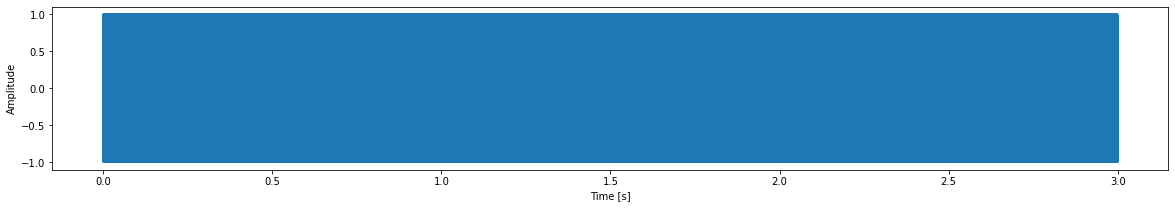

In [55]:

fig = plt.figure(figsize=(20,3))
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data)
;

the frequency domain of the whole sample

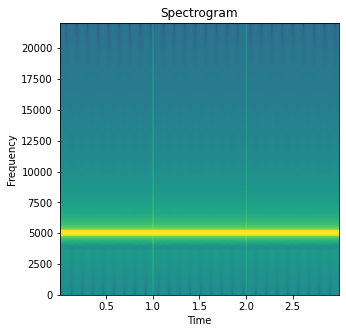

In [56]:
plt.figure(figsize=(5,5))

plt.title('Spectrogram')
plt.specgram(data,Fs=sample_rate)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

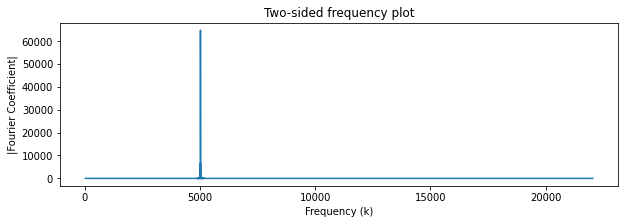

In [57]:
full_fft_data = (np.abs(np.fft.rfft(data)))
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot()
x_idx = np.linspace(20, sample_rate / 2.0, full_fft_data.shape[0])
ax.plot(x_idx, full_fft_data)
plt.xlabel("Frequency (k)")
plt.title("Two-sided frequency plot")
plt.ylabel("|Fourier Coefficient|")
plt.show()

we compute the fourrier transform using a frame size of 1024

In [58]:
frameSize = 2**12
overlapFac=0.995
frameSize

4096

In [59]:
from numpy.lib import stride_tricks

hopSize = int(frameSize - np.floor(overlapFac * frameSize))
samples = np.append(np.zeros(int(np.floor(frameSize/2.0))), data)
cols = np.ceil( (len(samples) - frameSize) / float(hopSize)) + 1
samples = np.append(samples, np.zeros(frameSize))
frames = stride_tricks.as_strided(samples, shape=(int(cols), frameSize), strides=(samples.strides[0]*hopSize, samples.strides[0])).copy()
frames *= np.hamming(frameSize)
full_fft_data = (10*np.log(10) * np.abs(np.fft.rfft(frames)))
full_fft_data.shape

(6204, 2049)

In [60]:
def convert_size(size_bytes):
    import math
    if size_bytes == 0:
        return "0B"
    size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes / p, 2)
    return "%s %s" % (s, size_name[i])

convert_size(full_fft_data.nbytes)

'96.98 MB'

''

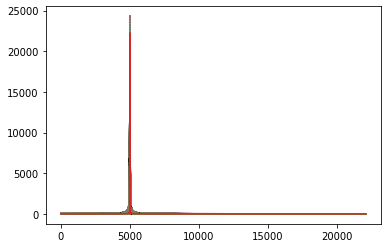

In [65]:
fig = plt.figure()
ax = fig.add_subplot()
x_idx = np.linspace(0, sample_rate / 2.0, full_fft_data.shape[1])
#[plt.plot(x_idx, frame) for frame in frames]

[ax.plot(x_idx, frame) for frame in full_fft_data]
;

In [62]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import animation, rc
# from IPython.display import HTML
#
#
#
# # First set up the figure, the axis, and the plot element we want to animate
# fig = plt.figure()
# ax = fig.add_subplot()
#
# x_idx = np.linspace(0, sample_rate / 2.0, full_fft_data.shape[1])
# line,  = ax.plot(x_idx, full_fft_data[0])
# ax.set_xscale('log')
# ax.set_xlim((1, sample_rate / 2.0))
# ax.set_ylim((0, np.max(full_fft_data)))
#
# # animation function. This is called sequentially
# def animate(i):
#     line.set_ydata(full_fft_data[i])
#     return (line,)
#
#
# rc('animation', html='jshtml')
# # call the animator. blit=True means only re-draw the parts that have changed.
# anim = animation.FuncAnimation(fig, animate,
#                                frames=full_fft_data.shape[0], interval=1, blit=True)
#
# HTML(anim.to_jshtml())

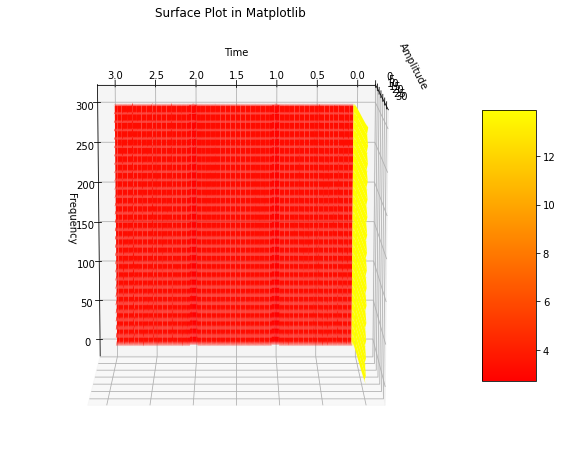

(6204, 2049)

In [63]:
import matplotlib.pyplot as plt

frequency_cut_top = 300
filtered_fft = full_fft_data[:, 0:int(frequency_cut_top/10)]

(x, y) = np.meshgrid(np.linspace(0, frequency_cut_top, filtered_fft.shape[1]), np.linspace(0, length, filtered_fft.shape[0]))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=100, azim=-180)


the_plot = ax.plot_surface(x, y, filtered_fft ,cmap='autumn', shade=True)
ax.set_title('Surface Plot in Matplotlib')
ax.set_xlabel('Frequency')
ax.set_ylabel('Time')
ax.set_zlabel('Amplitude')

fig.colorbar(the_plot, shrink=0.5, aspect=5)
plt.show()
full_fft_data.shape

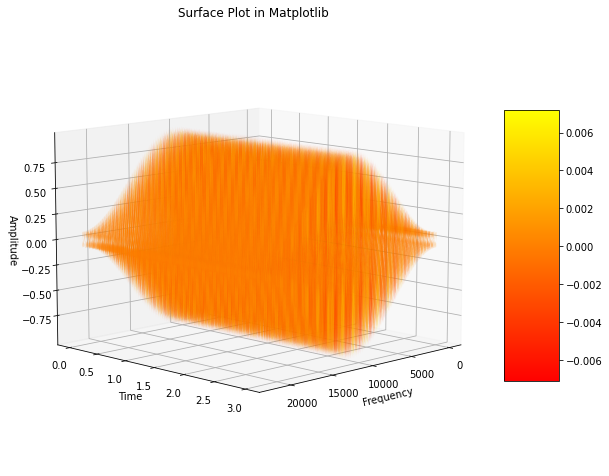

''

In [64]:
import matplotlib.pyplot as plt

(x, y) = np.meshgrid(np.linspace(0, sample_rate / 2.0, frames.shape[1]), np.linspace(0, length, frames.shape[0]))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10, azim=45)



the_plot = ax.plot_surface(x, y, frames ,cmap='autumn', shade=True)
ax.set_title('Surface Plot in Matplotlib')
ax.set_xlabel('Frequency')
ax.set_ylabel('Time')

ax.set_zlabel('Amplitude')

fig.colorbar(the_plot, shrink=0.5, aspect=5)
plt.show()
;
